todo: make plots look pretty

# Assignment 6: Knock Airport Weather

Plot:

* The temperature
* The mean temperature each day
* The mean temperature for each month
* The windspeed (there is data missing from this column)
* The rolling windspeed
* The max windspeed for each day
* The monthly mean of the daily max windspeeds

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'

df = pd.read_csv(url, skiprows=23)
df.head()

C:\Users\luxxx\AppData\Local\Temp\ipykernel_86576\4234222533.py:3: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [3]:
df.shape

(255690, 21)

In [4]:
df['date']

0         10-apr-1996 14:00
1         31-jul-1996 08:00
2         31-jul-1996 09:00
3         31-jul-1996 10:00
4         31-jul-1996 11:00
                ...        
255685    30-sep-2025 20:00
255686    30-sep-2025 21:00
255687    30-sep-2025 22:00
255688    30-sep-2025 23:00
255689    01-oct-2025 00:00
Name: date, Length: 255690, dtype: object

In [5]:
df['date'] = pd.to_datetime(df['date'])

C:\Users\luxxx\AppData\Local\Temp\ipykernel_86576\3532345252.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [6]:
df['date'].head()

0   1996-04-10 14:00:00
1   1996-07-31 08:00:00
2   1996-07-31 09:00:00
3   1996-07-31 10:00:00
4   1996-07-31 11:00:00
Name: date, dtype: datetime64[ns]

In [7]:
df.set_index(df['date'], inplace=True)

In [8]:
df.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
1996-07-31 10:00:00,1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
1996-07-31 11:00:00,1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [9]:
df.drop(['date'], axis=1, inplace=True)

In [10]:
df.head()

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7
1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,0,0,0,0,25,82,0.0,28000,35,6
1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,1011.0,0,0,0,0,2,11,0.0,40000,40,6


Station Name: KNOCK AIRPORT
Station Height: 201 M 
Latitude:53.906  ,Longitude: -8.817

date:  -  Date and Time (utc)
rain:  -  Precipitation Amount (mm)
temp:  -  Air Temperature (C)	
wetb:  -  Wet Bulb Temperature (C)
dewpt: -  Dew Point Temperature (C)             
rhum:  -  Relative Humidity (%)
vappr: -  Vapour Pressure (hPa)	 
msl:   -  Mean Sea Level Pressure (hPa)
wdsp:  -  Mean Wind Speed (knot)
wddir: -  Predominant Wind Direction (degree)
ww:    -  Synop code for Present Weather
w:     -  Synop code for Past Weather
sun:   -  Sunshine duration (hours)
vis:   -  Visibility (m)
clht:  -  Cloud height (100's of ft) - 999 if none
clamt: -  Cloud amount
ind:   -  Indicator

## Plotting the temperature

<Axes: xlabel='date', ylabel='temp'>

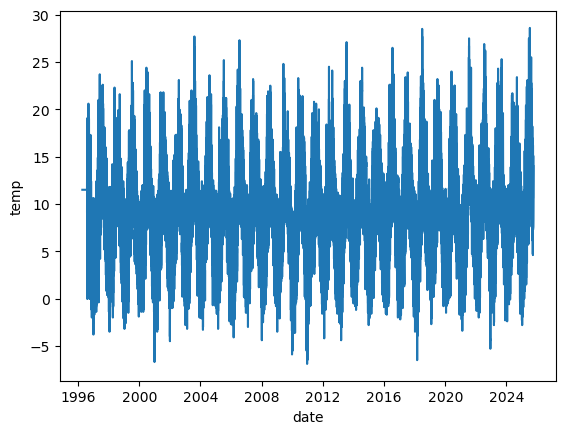

In [11]:
sns.lineplot(df['temp'])

## Plotting daily mean temperature

In [12]:
temp_daily_mean = df['temp'].resample('D').mean()
temp_daily_mean


date
1996-04-10    11.500000
1996-04-11          NaN
1996-04-12          NaN
1996-04-13          NaN
1996-04-14          NaN
                ...    
2025-09-27    10.866667
2025-09-28     9.650000
2025-09-29    11.416667
2025-09-30    13.554167
2025-10-01    14.000000
Freq: D, Name: temp, Length: 10767, dtype: float64

<Axes: xlabel='date', ylabel='temp'>

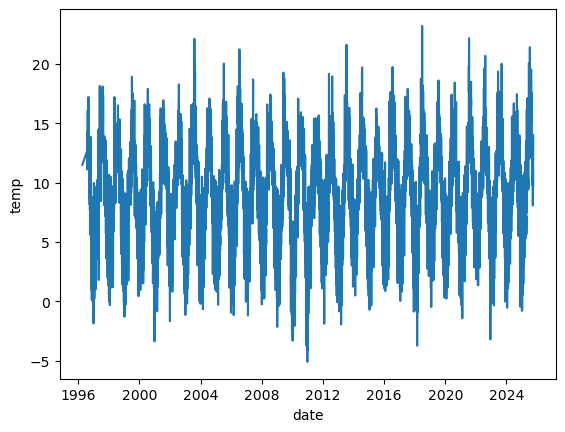

In [13]:
sns.lineplot(temp_daily_mean)

## Plotting monthly mean temperature

In [14]:
temp_monthly_mean = df['temp'].resample('MS').mean()
temp_monthly_mean

date
1996-04-01    11.500000
1996-05-01          NaN
1996-06-01          NaN
1996-07-01    12.650000
1996-08-01    12.946909
                ...    
2025-06-01    13.433889
2025-07-01    15.068280
2025-08-01    15.178495
2025-09-01    11.368056
2025-10-01    14.000000
Freq: MS, Name: temp, Length: 355, dtype: float64

<Axes: xlabel='date', ylabel='temp'>

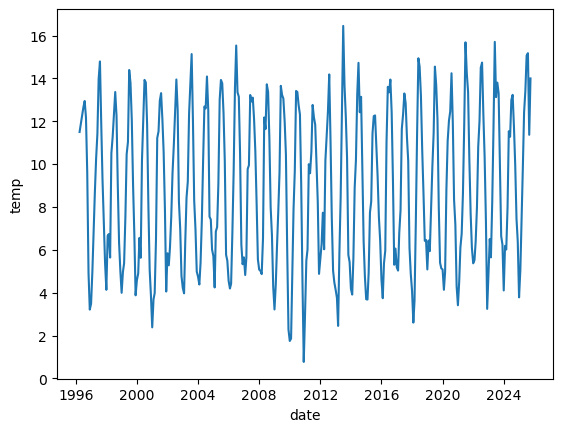

In [15]:
sns.lineplot(temp_monthly_mean)

## Plotting windspeed

In [16]:
windspeed = df['wdsp'].dropna().loc[df['wdsp'] != ' ']
windspeed

date
1996-04-10 14:00:00     0
1996-07-31 08:00:00     0
1996-07-31 09:00:00     0
1996-07-31 10:00:00     0
1996-07-31 11:00:00     0
                       ..
2025-09-30 20:00:00    14
2025-09-30 21:00:00    15
2025-09-30 22:00:00    14
2025-09-30 23:00:00    17
2025-10-01 00:00:00    16
Name: wdsp, Length: 255640, dtype: object

In [17]:
windspeed = windspeed.astype(int)
windspeed = windspeed.iloc[windspeed.index > '1996-08-01']
windspeed

date
1996-08-01 01:00:00     6
1996-08-01 02:00:00     8
1996-08-01 03:00:00     9
1996-08-01 04:00:00     8
1996-08-01 05:00:00     8
                       ..
2025-09-30 20:00:00    14
2025-09-30 21:00:00    15
2025-09-30 22:00:00    14
2025-09-30 23:00:00    17
2025-10-01 00:00:00    16
Name: wdsp, Length: 255622, dtype: int32

In [18]:
windspeed.loc[(windspeed.index > '1996-9-01 00:00:00') & (windspeed.index < '1996-09-03 00:00:00')]

date
1996-09-01 01:00:00    0
1996-09-01 02:00:00    0
1996-09-01 03:00:00    0
1996-09-01 04:00:00    0
1996-09-01 05:00:00    0
1996-09-01 06:00:00    0
1996-09-01 07:00:00    0
1996-09-01 08:00:00    0
1996-09-01 09:00:00    0
1996-09-01 10:00:00    0
1996-09-01 11:00:00    0
1996-09-01 12:00:00    0
1996-09-01 13:00:00    0
1996-09-01 14:00:00    0
1996-09-01 15:00:00    0
1996-09-01 16:00:00    0
1996-09-01 17:00:00    0
1996-09-01 18:00:00    0
1996-09-01 19:00:00    0
1996-09-01 20:00:00    0
1996-09-01 21:00:00    0
1996-09-01 22:00:00    0
1996-09-01 23:00:00    0
1996-09-02 00:00:00    0
1996-09-02 01:00:00    0
1996-09-02 02:00:00    0
1996-09-02 03:00:00    0
1996-09-02 04:00:00    0
1996-09-02 05:00:00    0
1996-09-02 06:00:00    0
1996-09-02 07:00:00    0
1996-09-02 08:00:00    0
1996-09-02 09:00:00    0
1996-09-02 10:00:00    0
1996-09-02 11:00:00    0
1996-09-02 12:00:00    0
1996-09-02 13:00:00    0
1996-09-02 14:00:00    0
1996-09-02 15:00:00    0
1996-09-02 16:00:00 

It looks like there are full days where windspeed is 0. This looks like a failure of the equipment rather than continuous days of calm weather. I could discount any measurements of 0 but this may remove valid measurements as well.

<Axes: xlabel='date', ylabel='wdsp'>

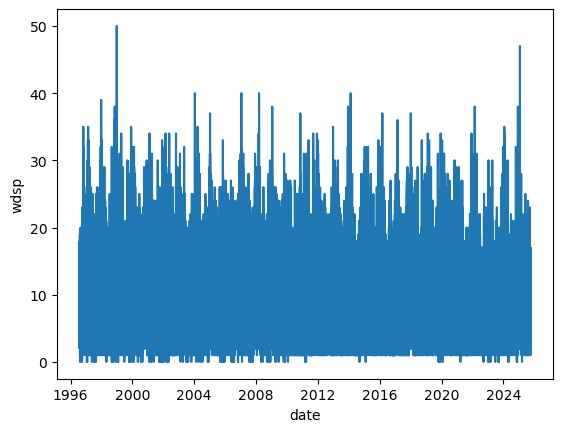

In [19]:
sns.lineplot(windspeed)

It looks like there are entire year spans of no measurements of 0 knots. It is possible that all of the 0 measurements are failures.

In [20]:
pd.set_option('display.max_rows', None)
windspeed.loc[windspeed == 0]

date
1996-08-13 01:00:00    0
1996-09-01 01:00:00    0
1996-09-01 02:00:00    0
1996-09-01 03:00:00    0
1996-09-01 04:00:00    0
1996-09-01 05:00:00    0
1996-09-01 06:00:00    0
1996-09-01 07:00:00    0
1996-09-01 08:00:00    0
1996-09-01 09:00:00    0
1996-09-01 10:00:00    0
1996-09-01 11:00:00    0
1996-09-01 12:00:00    0
1996-09-01 13:00:00    0
1996-09-01 14:00:00    0
1996-09-01 15:00:00    0
1996-09-01 16:00:00    0
1996-09-01 17:00:00    0
1996-09-01 18:00:00    0
1996-09-01 19:00:00    0
1996-09-01 20:00:00    0
1996-09-01 21:00:00    0
1996-09-01 22:00:00    0
1996-09-01 23:00:00    0
1996-09-02 00:00:00    0
1996-09-02 01:00:00    0
1996-09-02 02:00:00    0
1996-09-02 03:00:00    0
1996-09-02 04:00:00    0
1996-09-02 05:00:00    0
1996-09-02 06:00:00    0
1996-09-02 07:00:00    0
1996-09-02 08:00:00    0
1996-09-02 09:00:00    0
1996-09-02 10:00:00    0
1996-09-02 11:00:00    0
1996-09-02 12:00:00    0
1996-09-02 13:00:00    0
1996-09-02 14:00:00    0
1996-09-02 15:00:00 

It looks like there were two full days in September 1996 where there was a windspeed of 0. It happens again in 1999 for several days in Nov. This looks like a failure. The rest of the 0 values are spread out sufficiently to be real values. Is it worth removing these days from the analysis?

I will leave them in as without more information it is possible these are valid observations.

## Average windspeed over 24 hours

In [21]:
wdsp_daily_mean = windspeed.resample('D').mean()
wdsp_daily_mean


date
1996-08-01    10.409091
1996-08-02     7.625000
1996-08-03     6.666667
1996-08-04    11.041667
1996-08-05     8.000000
1996-08-06    12.666667
1996-08-07     7.125000
1996-08-08    12.583333
1996-08-09    12.208333
1996-08-10     6.708333
1996-08-11     8.333333
1996-08-12     3.916667
1996-08-13     4.291667
1996-08-14     3.583333
1996-08-15     7.125000
1996-08-16     7.166667
1996-08-17    10.208333
1996-08-18    10.750000
1996-08-19     6.791667
1996-08-20     9.708333
1996-08-21     6.875000
1996-08-22     9.000000
1996-08-23     4.333333
1996-08-24    12.125000
1996-08-25    12.958333
1996-08-26    10.625000
1996-08-27     9.958333
1996-08-28     8.541667
1996-08-29     5.916667
1996-08-30     8.500000
1996-08-31     5.083333
1996-09-01     0.166667
1996-09-02     0.000000
1996-09-03     4.375000
1996-09-04     8.083333
1996-09-05     7.583333
1996-09-06     5.583333
1996-09-07     4.708333
1996-09-08     4.958333
1996-09-09     9.250000
1996-09-10     7.583333
1996-09-11 

<Axes: xlabel='date', ylabel='wdsp'>

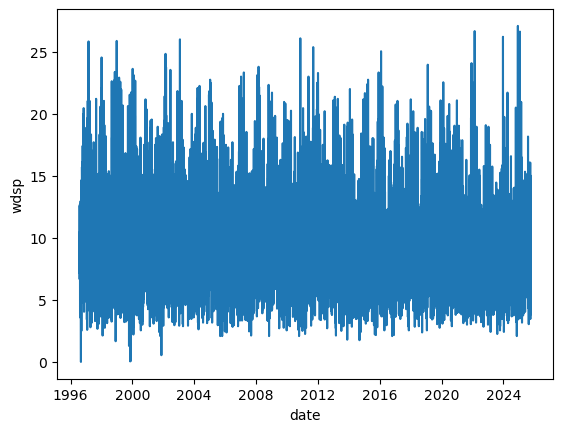

In [22]:
sns.lineplot(wdsp_daily_mean)

## Daily max windspeed

In [23]:
wdsp_daily_max = windspeed.resample('D').max()
wdsp_daily_max

date
1996-08-01    14
1996-08-02    13
1996-08-03    10
1996-08-04    18
1996-08-05    14
1996-08-06    19
1996-08-07    14
1996-08-08    17
1996-08-09    16
1996-08-10    15
1996-08-11    12
1996-08-12     5
1996-08-13     7
1996-08-14     5
1996-08-15     9
1996-08-16     9
1996-08-17    14
1996-08-18    17
1996-08-19    10
1996-08-20    14
1996-08-21    10
1996-08-22    13
1996-08-23     6
1996-08-24    20
1996-08-25    18
1996-08-26    13
1996-08-27    14
1996-08-28    12
1996-08-29    10
1996-08-30    13
1996-08-31     7
1996-09-01     4
1996-09-02     0
1996-09-03     7
1996-09-04    11
1996-09-05    11
1996-09-06     8
1996-09-07     6
1996-09-08     6
1996-09-09    16
1996-09-10    10
1996-09-11    14
1996-09-12    13
1996-09-13     5
1996-09-14     7
1996-09-15    15
1996-09-16    19
1996-09-17    19
1996-09-18    17
1996-09-19    14
1996-09-20    11
1996-09-21    10
1996-09-22    11
1996-09-23    12
1996-09-24    18
1996-09-25    15
1996-09-26    20
1996-09-27    19
1996-09-2

<Axes: xlabel='date', ylabel='wdsp'>

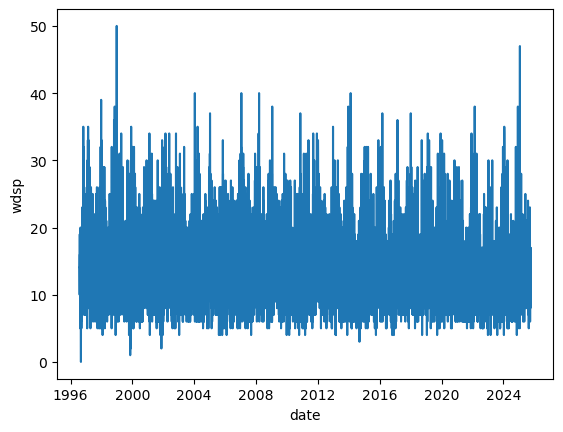

In [24]:
sns.lineplot(wdsp_daily_max)

# Monthly mean of daily max windspeed

In [25]:
mean_max_wdsp = wdsp_daily_max.resample('MS').mean()
mean_max_wdsp

date
1996-08-01    12.516129
1996-09-01    12.266667
1996-10-01    18.193548
1996-11-01    17.133333
1996-12-01    13.258065
1997-01-01    11.709677
1997-02-01    23.500000
1997-03-01    17.225806
1997-04-01    12.466667
1997-05-01    12.451613
1997-06-01    14.733333
1997-07-01    12.967742
1997-08-01    13.193548
1997-09-01    13.966667
1997-10-01    13.064516
1997-11-01    13.166667
1997-12-01    18.064516
1998-01-01    15.903226
1998-02-01    18.500000
1998-03-01    14.677419
1998-04-01    14.566667
1998-05-01    12.161290
1998-06-01    13.633333
1998-07-01    15.032258
1998-08-01    15.161290
1998-09-01    13.600000
1998-10-01    17.161290
1998-11-01    17.233333
1998-12-01    18.096774
1999-01-01    18.129032
1999-02-01    18.392857
1999-03-01    16.806452
1999-04-01    17.333333
1999-05-01    14.000000
1999-06-01    13.166667
1999-07-01    13.129032
1999-08-01    12.193548
1999-09-01    14.666667
1999-10-01    15.225806
1999-11-01    14.866667
1999-12-01    18.612903
2000-01-01 

<Axes: xlabel='date', ylabel='wdsp'>

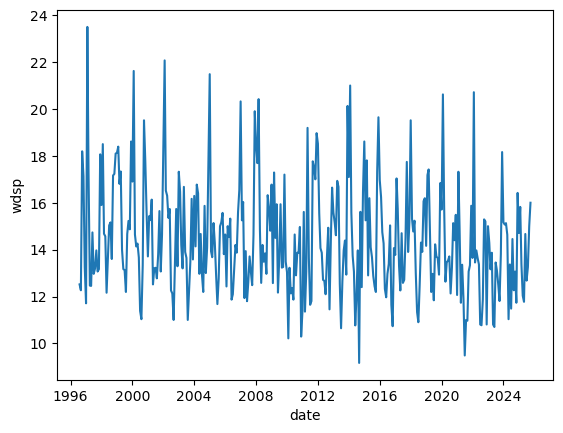

In [26]:
sns.lineplot(mean_max_wdsp)